# Unemployment Analysis with Python

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")#Loading dataset into df
df['Date'] = pd.to_datetime(df[' Date'].str.strip(), format='%d-%m-%Y')  # Convert Date column to datetime

In [30]:
df.head()#printing first five rows


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Date
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,2020-01-31
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,2020-02-29
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,2020-03-31
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,2020-04-30
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,2020-05-31


In [36]:
df = df.drop(" Date", axis=1)

In [37]:
df.shape#Checking Shape of Our Dataset

(267, 9)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1    Frequency                                267 non-null    object        
 2    Estimated Unemployment Rate (%)          267 non-null    float64       
 3    Estimated Employed                       267 non-null    int64         
 4    Estimated Labour Participation Rate (%)  267 non-null    float64       
 5   Region.1                                  267 non-null    object        
 6   longitude                                 267 non-null    float64       
 7   latitude                                  267 non-null    float64       
 8   Date                                      267 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4),

In [39]:
df.describe()#Get stats of our data

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Date
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,2020-06-16 09:15:30.337078528
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,2020-01-31 00:00:00
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,2020-03-31 00:00:00
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,2020-06-30 00:00:00
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,2020-08-31 00:00:00
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,2020-10-31 00:00:00
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,NaN


Checking for Null values

In [40]:
df.isnull().sum()

,0
Region,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0
Date,0


Checking for Duplicate Values

In [41]:
df.duplicated().sum()

0

Line Plot - Unemployment Rate Over Time by Region

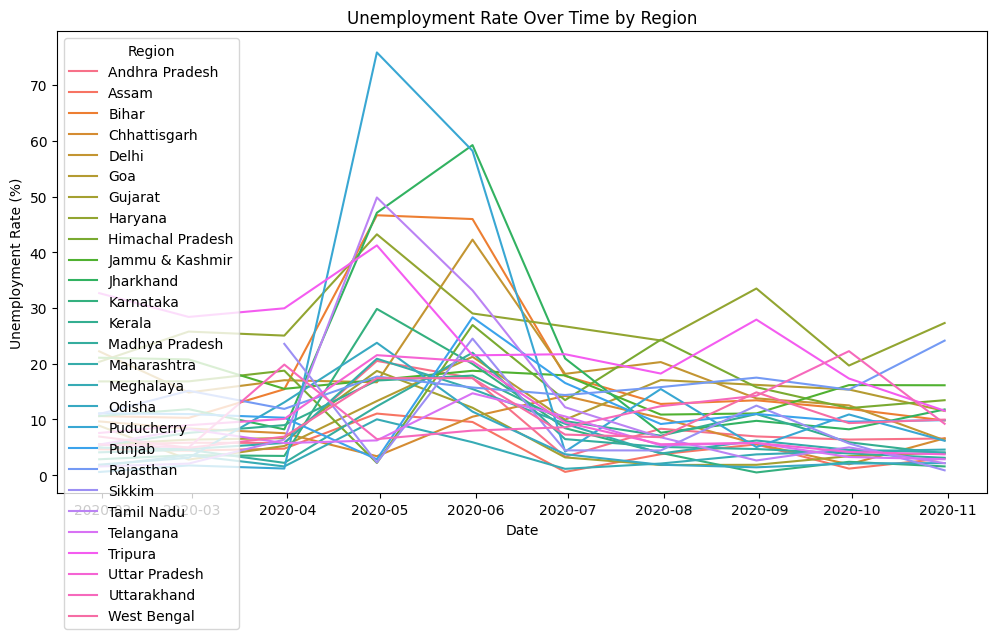

In [64]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y=' Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Region")
plt.show()

Bar Plot - Average Unemployment Rate by Region

In [69]:
average_unemployment = df[' Estimated Unemployment Rate (%)'].mean()
fig = px.bar(
    df,
    x='Region',
    y=' Estimated Unemployment Rate (%)',
    color='Region',
    title="Average Unemployment Rate by Region with Overall Average Line",
    template='seaborn'
)
fig.update_layout(
    xaxis=dict(categoryorder='total descending'),
    xaxis_title="Region",
    yaxis_title="Unemployment Rate (%)")
fig.add_trace(
    go.Scatter(
        x=df['Region'].unique(),
        y=[average_unemployment] * len(df['Region'].unique()),
        mode="lines",
        name="Overall Average",
        line=dict(color="red", dash="dash")
    )
)
fig.show()


Heatmap - Correlation Between Variables

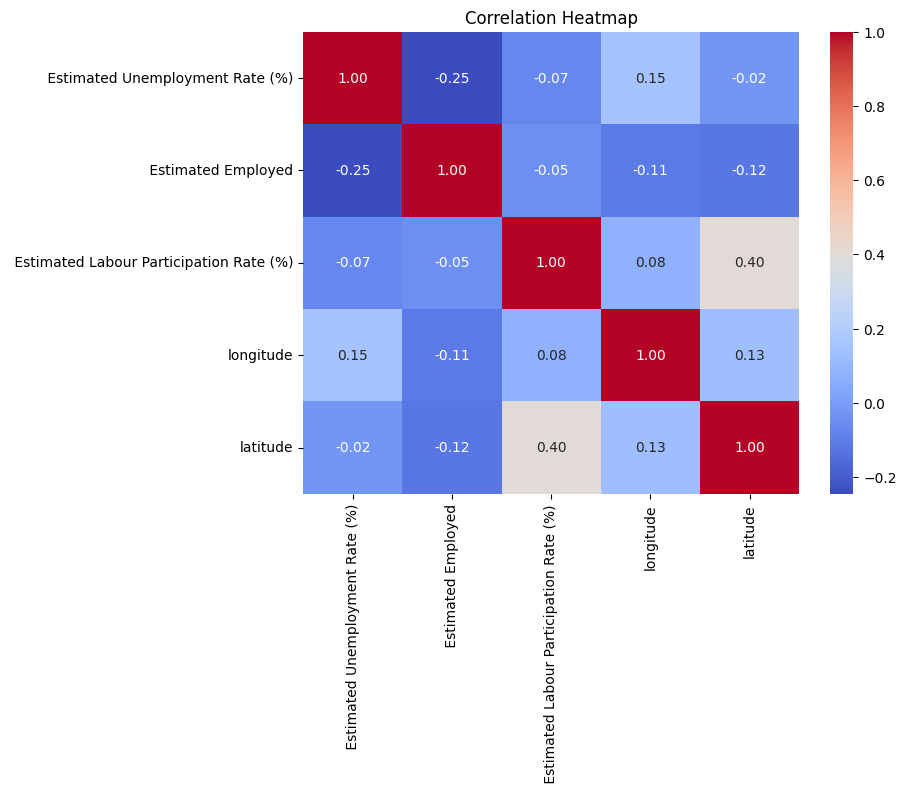

In [52]:
#Extracting Non neumeric cols and plotting HeatMap
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
numeric_df = df.drop(columns=non_numeric_cols)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Scatter Plot - Unemployment Rate vs. Labor Participation Rate

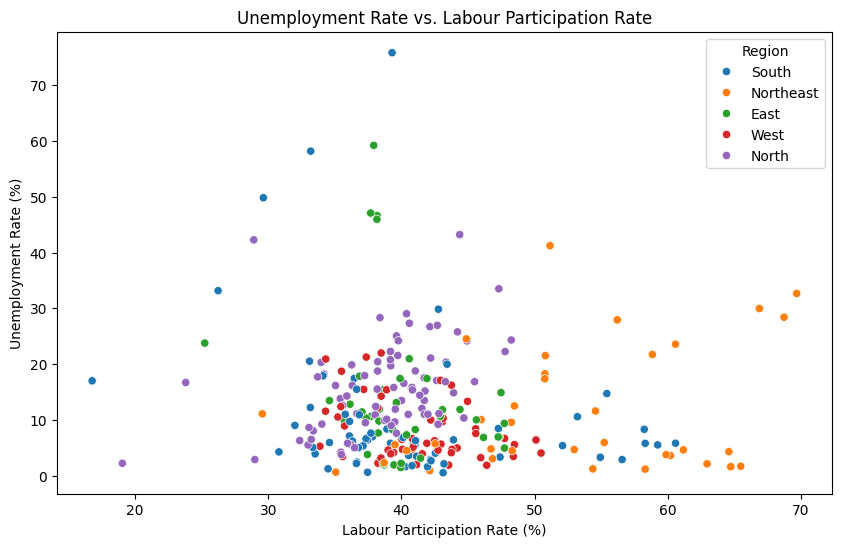

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)', hue='Region.1')
plt.title("Unemployment Rate vs. Labour Participation Rate")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Region")
plt.show()

Box Plot - Distribution of Unemployment Rate by Region

<ipython-input-55-1749893558e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region.1', y=' Estimated Unemployment Rate (%)', palette="Set2")


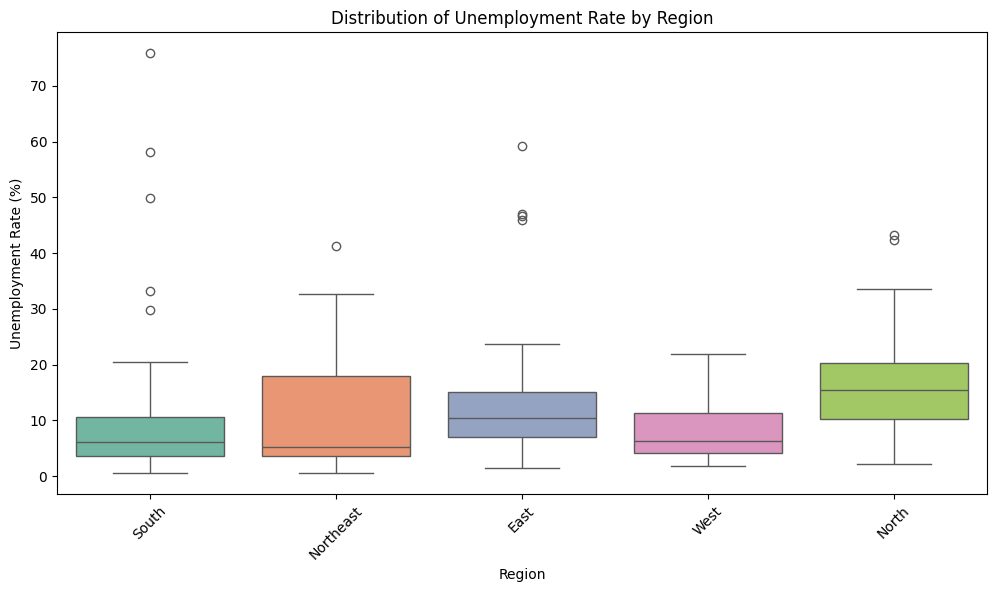

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region.1', y=' Estimated Unemployment Rate (%)', palette="Set2")
plt.title("Distribution of Unemployment Rate by Region")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


Time Series Plot - Employment and Labor Participation Rates Over Time

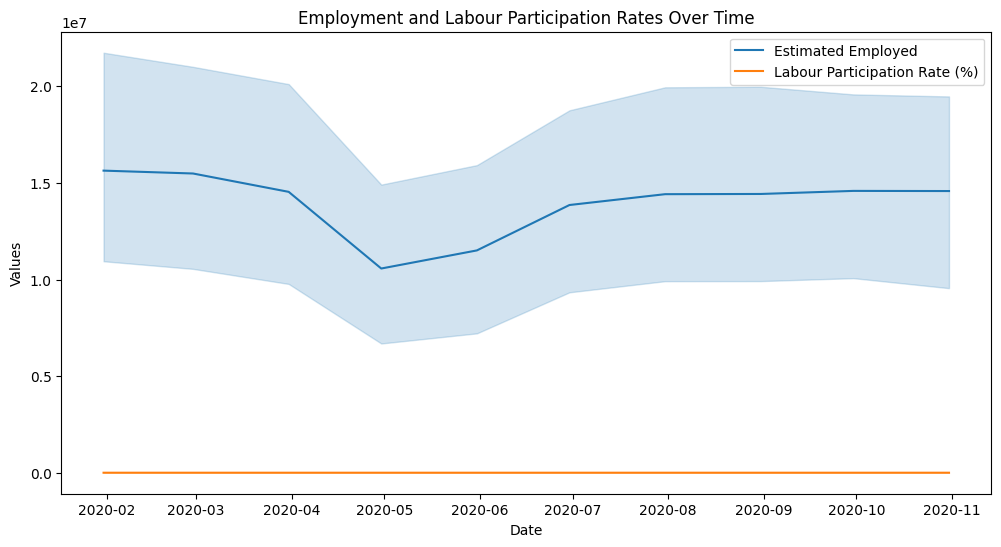

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y=' Estimated Employed', label="Estimated Employed")
sns.lineplot(data=df, x='Date', y=' Estimated Labour Participation Rate (%)', label="Labour Participation Rate (%)")
plt.title("Employment and Labour Participation Rates Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()


Geographical Visualization

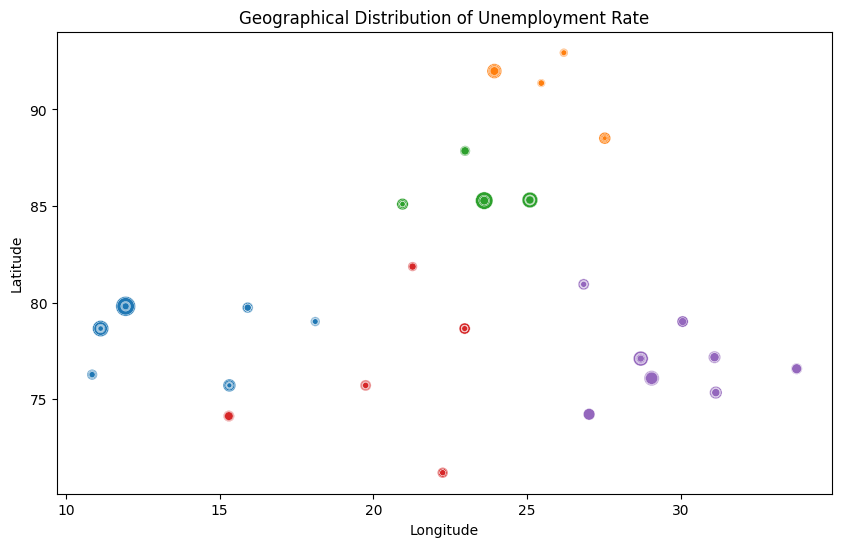

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Region.1', size=' Estimated Unemployment Rate (%)', sizes=(10, 200), legend=False)
plt.title("Geographical Distribution of Unemployment Rate")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
